In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ___FRED___
------------

In [2]:
fred = pd.read_csv(r"./data/FRED/FRED3_Entire_Database_2021.csv", low_memory=False, header=0, skiprows=range(1, 10))
meta = pd.read_csv(r"./data/FRED/FRED3_Column_Definitions_2021.csv", index_col=0, usecols=("column_id", "name"))
taxon_lookup = pd.read_csv(r"./data/plantlookup.csv", low_memory=False, encoding="latin")
family_lookup = pd.Series(index=taxon_lookup.genus, data=taxon_lookup.family.values)

In [63]:
# Australasian Virtual Herbaria collection records, filtered for Australia

artemisia = pd.read_csv(r"./data/AVH/artemisia.csv")
atriplex = pd.read_csv(r"./data/AVH/atriplex.csv")
suaeda = pd.read_csv(r"./data/AVH/suaeda.csv")
cyperus = pd.read_csv(r"./data/AVH/cyperus.csv")
heliotropium = pd.read_csv(r"./data/AVH/heliotropium.csv")
salsola = pd.read_csv(r"./data/AVH/salsola.csv")
australian_avh_records = pd.concat([artemisia, atriplex, suaeda, cyperus, heliotropium, salsola]).reset_index(drop=True)

In [20]:
cyperus_nsw = pd.read_csv(r"./data/AVH/cyperus_nsw.csv")
carex_nsw = pd.read_csv(r"./data/AVH/carex_nsw.csv")

In [115]:
# australian_avh_records

In [116]:
australian_avh_records

,taxon_name,count
0,Artemisia verlotiorum,104
1,Artemisia arborescens,71
2,Artemisia,16
3,Artemisia absinthium,16
4,Artemisia vulgaris,8
...,...,...
394,Salsola tragus,1259
395,Salsola kali,141
396,Salsola,19
397,Salsola kali var. kali,6


In [3]:
meta.name = meta.name.str.lower().str.replace(' ', '_').str.replace('/', '_')
with pd.option_context("display.max_rows", None):
    # print(meta.name)
    pass

In [4]:
meta.name[meta.name.str.contains("photo")]

column_id
F00043       plant_photosynthetic_pathway
F01232                chamber_photoperiod
F01261       photosynthesis_per_leaf_area
F01262     n_photosynthesis_per_leaf_area
F01263    se_photosynthesis_per_leaf_area
Name: name, dtype: object

In [5]:
# F00043 - plant_photosynthetic_pathway

fred.loc[:, "F00043"].isna().mean() # :/

np.float64(0.34575974820772865)

In [6]:
# F00056 - Root order
fred.loc[:, "F00056"].isna().mean() # jeez!

np.float64(0.8715334848749782)

In [7]:
fred.loc[:, "F00043"].dropna().unique()

array(['C3', 'C4', 'C3/CAM', 'C3/C4', 'CAM', 'C4/CAM'], dtype=object)

In [8]:
# meta.name[meta.name.str.contains("root_cortex")]
# meta.name[meta.name.str.contains("plant_taxonomy")]
# meta.name[meta.name.str.contains("order")]

In [9]:
# F00043 - plant_photosynthetic_pathway
# F00056 - root_order
# F00679 - root_diameter
# F00727 - specific_root_length_(srl)
# F00104 - root_cortex_thickness
# F00125 - root_stele_root_cortex_ratio

data = fred.loc[:, ["F00043", "F00679", "F00727", "F00104", "F00125", "F00017", "F00018", "F00019", "F00056"]].dropna(
                        subset=["F00043", "F00056"] # photosynthetic pathway and root order are non negotiable!!
                          ) # .query("F00056==1") # only choose the finest roots

data.rename(mapper={"F00679": "root_diameter",
                    "F00727": "specific_root_length",
                    "F00104": "root_cortex_thickness",
                    "F00125": "root_stele_root_cortex_ratio",
                    "F00017": "plant_taxonomy_family_data_source", 
                    "F00018": "plant_taxonomy_genus_data_source",
                    "F00019": "plant_taxonomy_species_data_source",
                    "F00056": "root_order"},
            axis=1, inplace=True)

In [10]:
data.groupby("F00043").count()

,root_diameter,specific_root_length,root_cortex_thickness,root_stele_root_cortex_ratio,plant_taxonomy_family_data_source,plant_taxonomy_genus_data_source,plant_taxonomy_species_data_source,root_order
F00043,,,,,,,,
C3,3547,1891,255,49,931,6030,6028,6036
C3/C4,0,3,0,0,0,3,3,3
C3/CAM,1,3,0,0,0,4,4,4
C4,12,6,0,0,0,29,29,29
CAM,107,0,0,0,0,120,120,120


In [11]:
with pd.option_context("display.max_rows", None):
    print(
        data.loc[:, ["F00043", "plant_taxonomy_family_data_source", "plant_taxonomy_genus_data_source"]
          ].groupby(["F00043", "plant_taxonomy_family_data_source"]).count()
         )

                                          plant_taxonomy_genus_data_source
F00043 plant_taxonomy_family_data_source                                  
C3     Aceraceae                                                        24
       Actinidiaceae                                                     1
       Adiantaceae                                                       4
       Adoxaceae                                                         1
       Alangiaceae                                                       1
       Altingiacae                                                       3
       Altingiaceae                                                      1
       Amaranthaceae                                                     5
       Anacardiaceae                                                     2
       Apocynaceae                                                       1
       Aquifoliaceae                                                     3
       Araliaceae        

In [12]:
# the differences could be attributed to the lack of diversity in the data for C4 and CAM groups

In [13]:
np.unique(data.F00043, return_counts=True)

(array(['C3', 'C3/C4', 'C3/CAM', 'C4', 'CAM'], dtype=object),
 array([6036,    3,    4,   29,  120]))

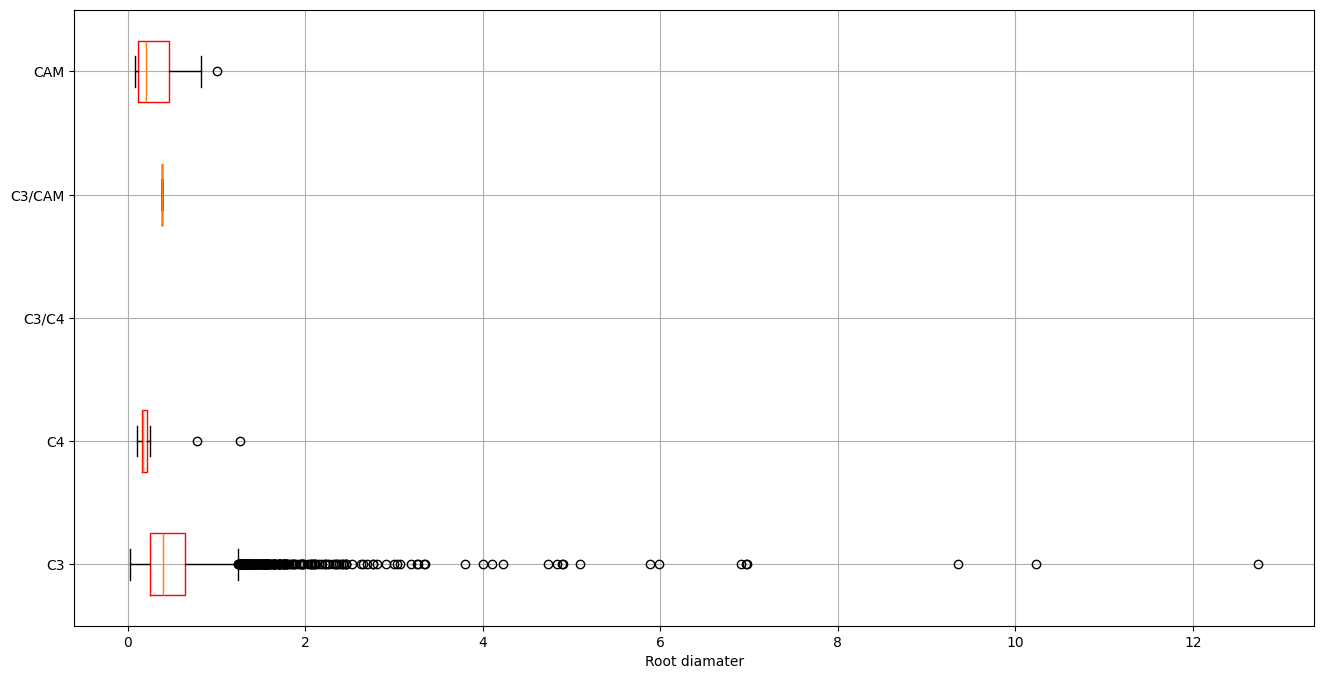

In [14]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.root_diameter.isna()) & (data.F00043 == pway), "root_diameter"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Root diamater")
axes.grid()
plt.show()

In [15]:
data.loc[:, ["F00043", "root_cortex_thickness"]].dropna().F00043.unique() # that's disappointing

array(['C3'], dtype=object)

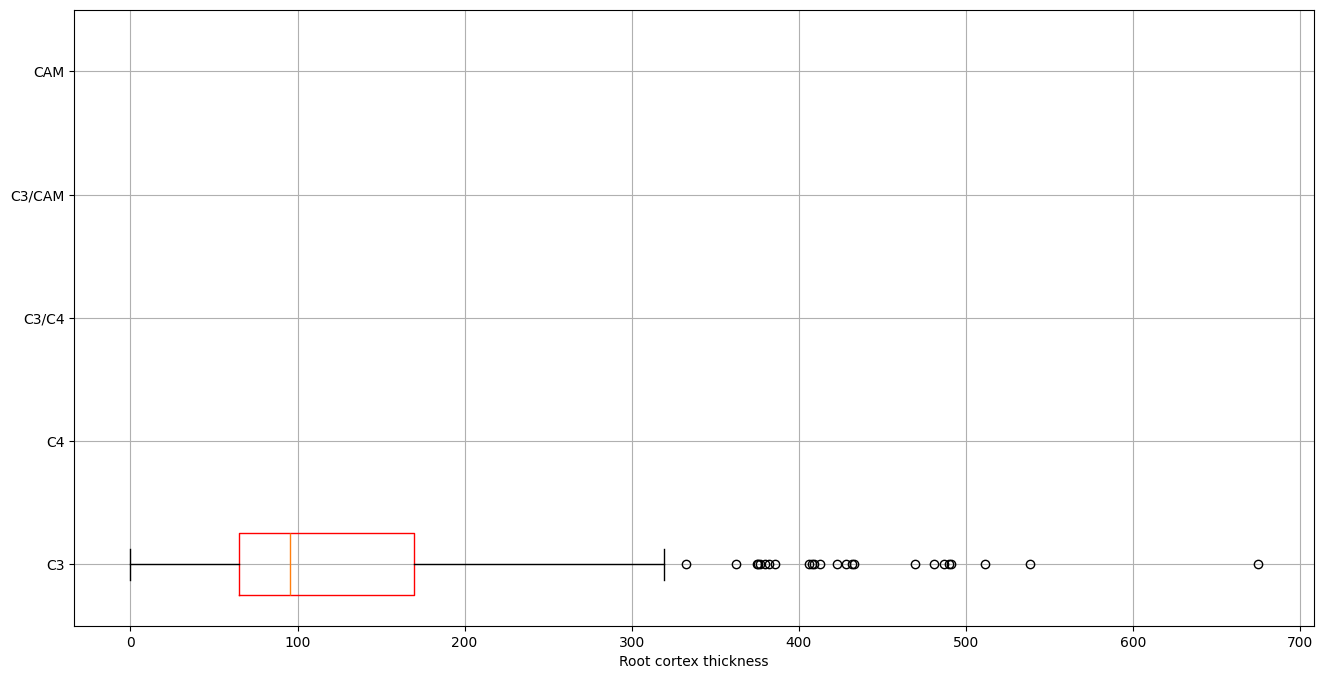

In [16]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.root_cortex_thickness.isna()) & (data.F00043 == pway), "root_cortex_thickness"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Root cortex thickness")
axes.grid()
plt.show()

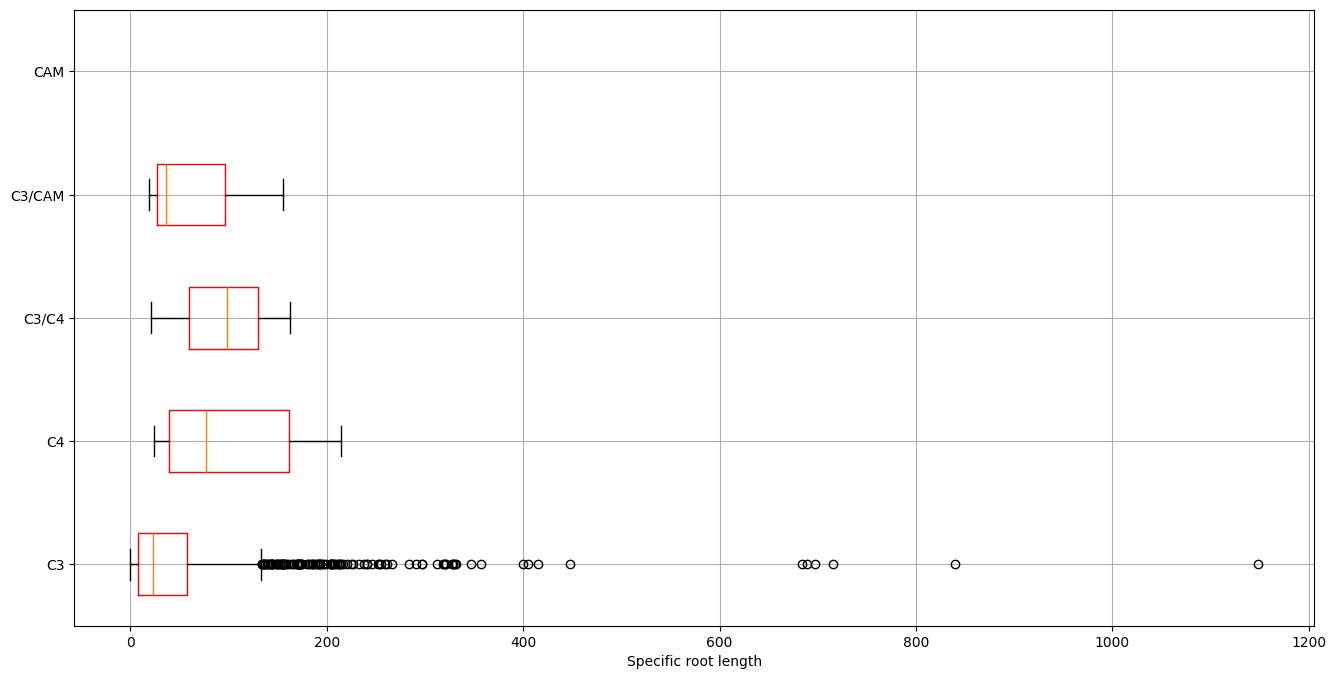

In [17]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.specific_root_length.isna()) & (data.F00043 == pway), "specific_root_length"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Specific root length")
axes.grid()
plt.show()

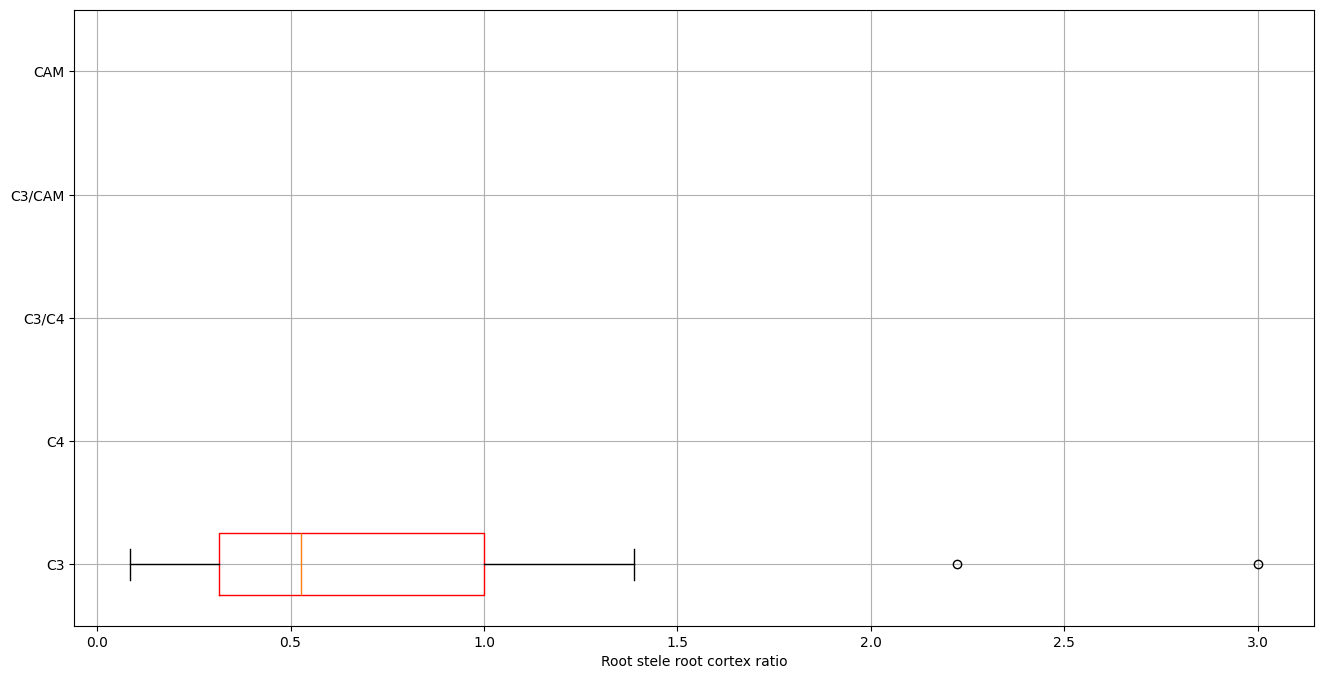

In [18]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
axes.boxplot(x=[data.loc[np.logical_not(data.root_stele_root_cortex_ratio.isna()) & (data.F00043 == pway), "root_stele_root_cortex_ratio"] for pway \
                in data.F00043.unique()], orientation="horizontal", tick_labels=list(data.F00043.unique()), boxprops={"color":"red"})
axes.set_xlabel("Root stele root cortex ratio")
axes.grid()
plt.show()

In [19]:
data.dropna(subset="root_diameter").plant_taxonomy_genus_data_source.isna().mean()

np.float64(0.0)

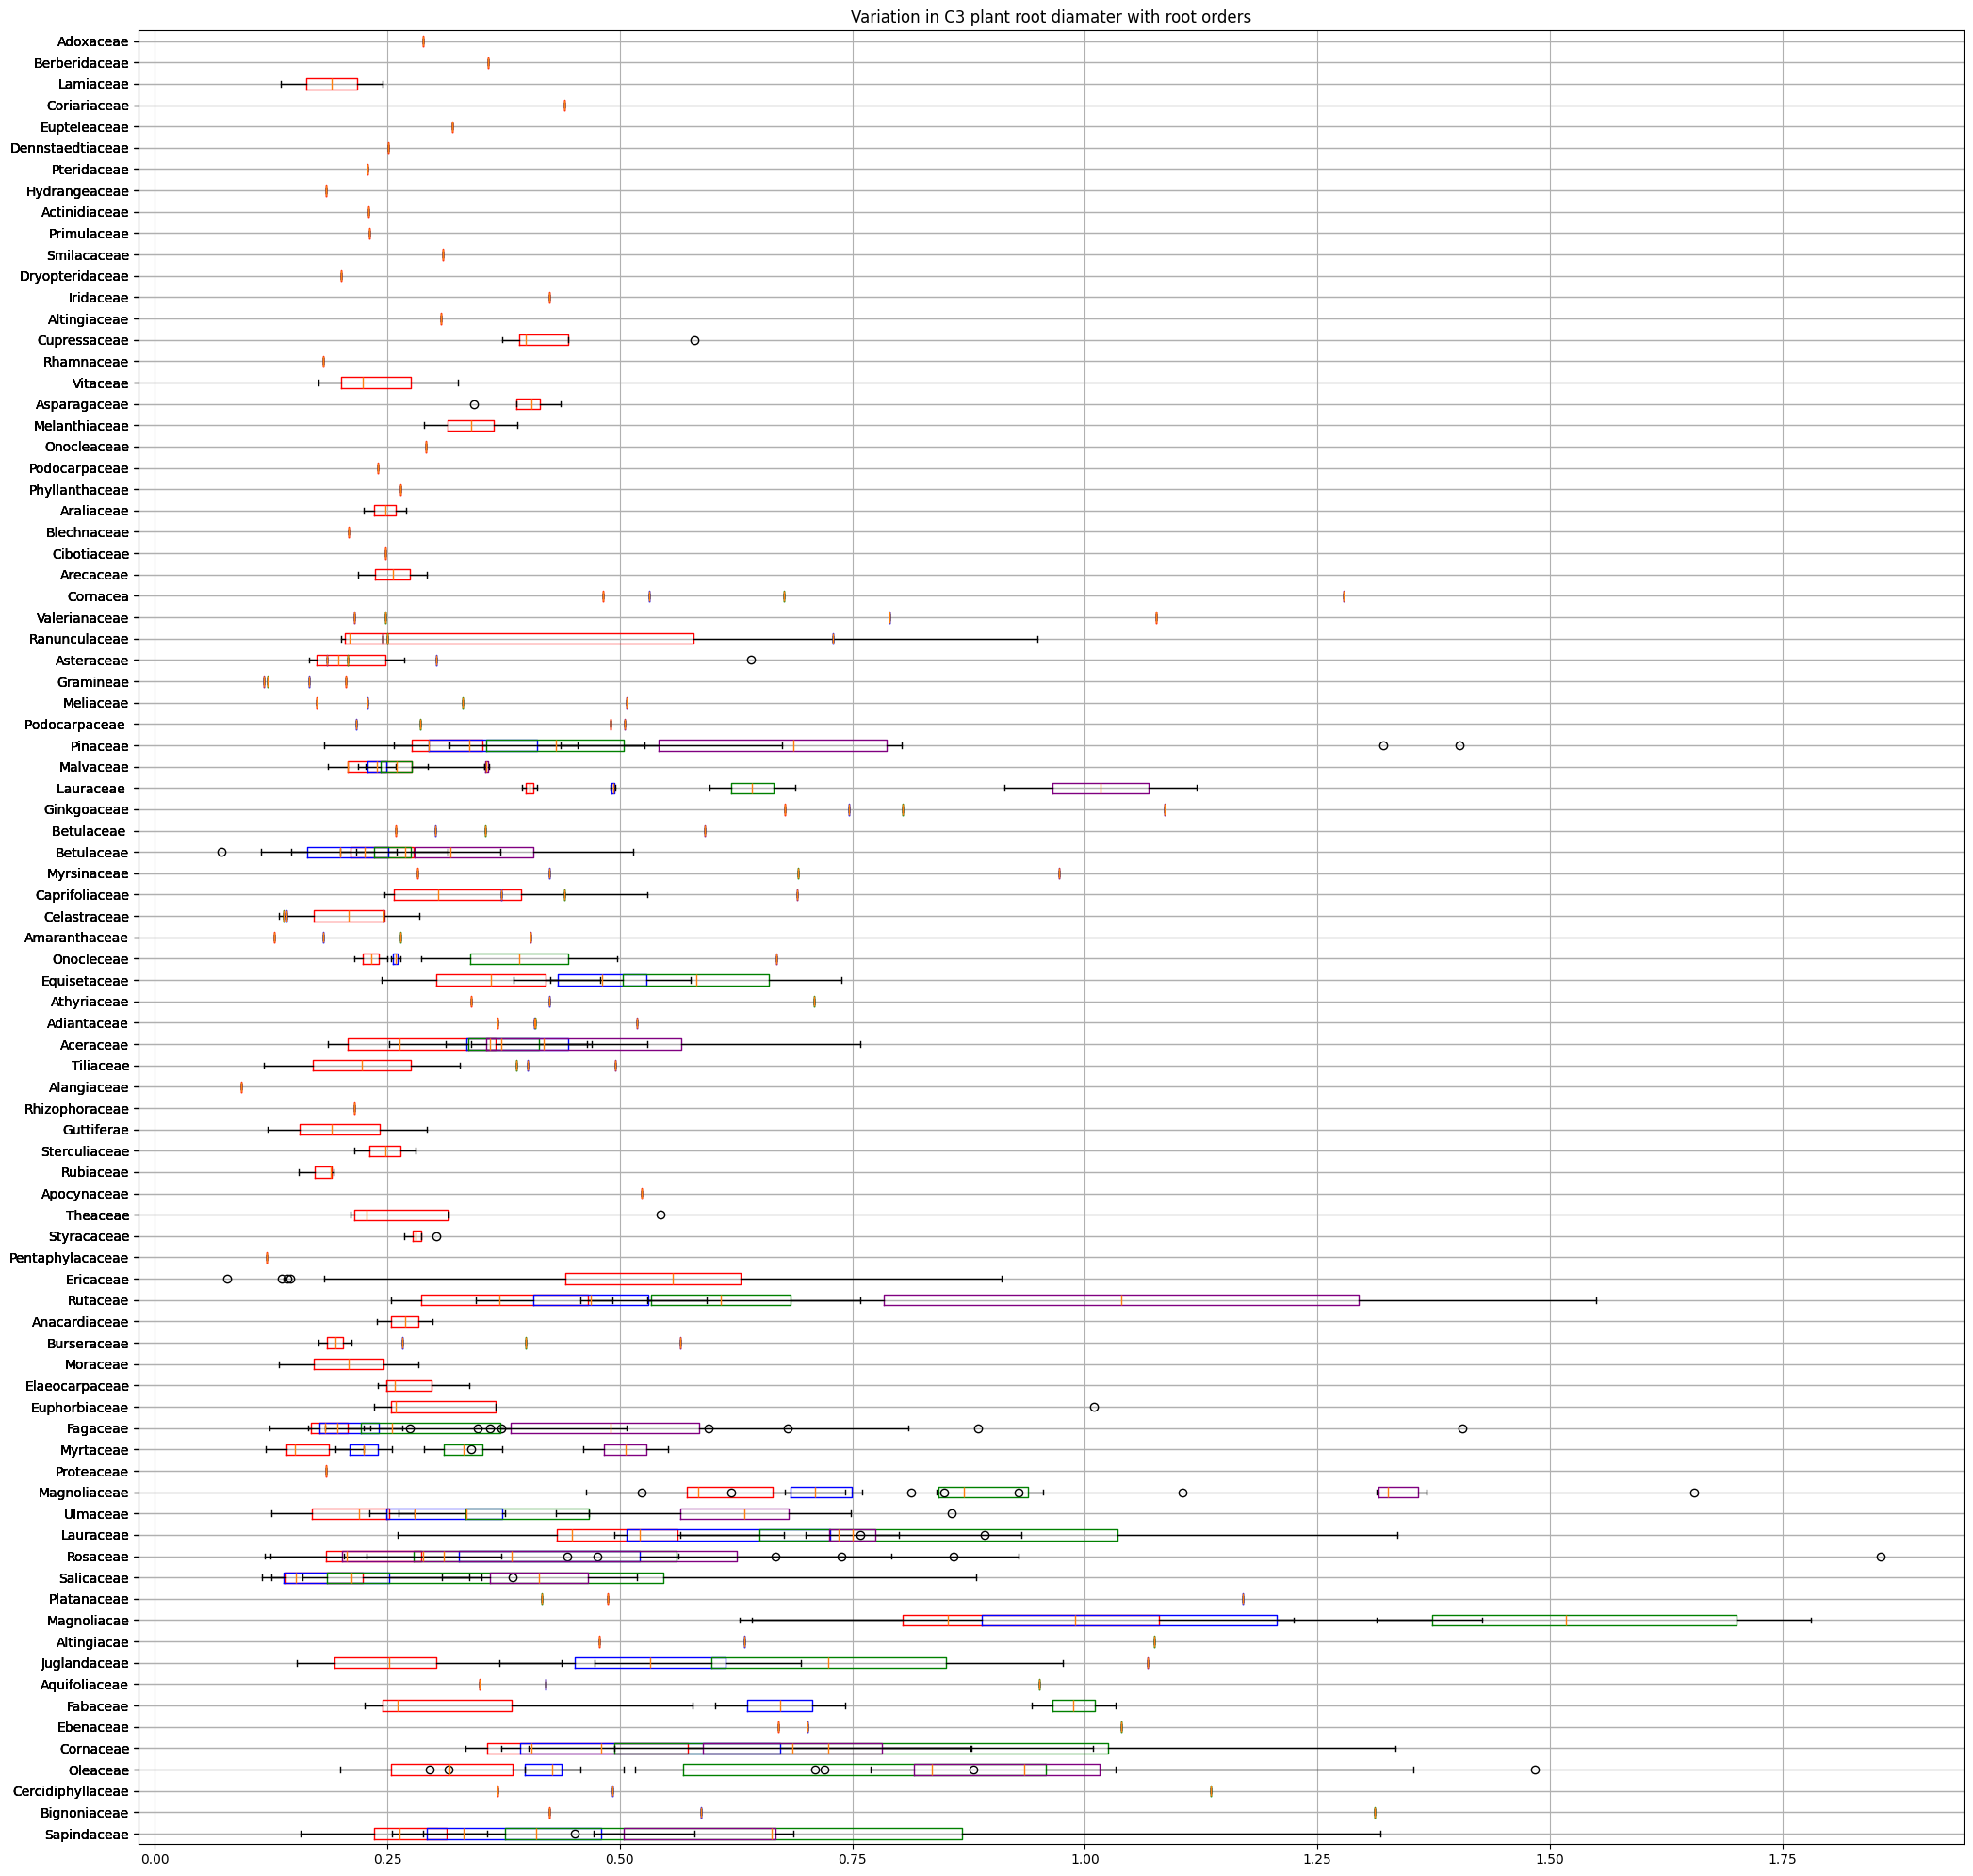

In [20]:
fig, axes = plt.subplots()
fig.set_size_inches(25, 25)

df = fred.loc[:, ["F00043", "F00679", "F00017", "F00056"]].\
                    dropna().rename(mapper= # plant_taxonomy_family_data_source, photosynthetic pathway, root diamater and root order are non negotiable!!
                                    {"F00679": "root_diameter",
                                     "F00017": "plant_taxonomy_family_data_source", 
                                     "F00056": "root_order"}, axis=1, inplace=False).query("F00043 == 'C3'")
unique_families = df.plant_taxonomy_family_data_source.unique()
axes.boxplot([df.query(f"root_order==1 & plant_taxonomy_family_data_source == \"{f}\"").root_diameter for f in unique_families],
             orientation="horizontal", tick_labels=unique_families, boxprops={"color":"red"}, label='1')

axes.boxplot([df.query(f"root_order==2 & plant_taxonomy_family_data_source == \"{f}\"").root_diameter for f in unique_families],
             orientation="horizontal", tick_labels=unique_families, boxprops={"color":"blue"}, label='2')

axes.boxplot([df.query(f"root_order==3 & plant_taxonomy_family_data_source == \"{f}\"").root_diameter for f in unique_families],
             orientation="horizontal", tick_labels=unique_families, boxprops={"color":"green"}, label='3')

axes.boxplot([df.query(f"root_order==4 & plant_taxonomy_family_data_source == \"{f}\"").root_diameter for f in unique_families],
             orientation="horizontal", tick_labels=unique_families, boxprops={"color":"purple"}, label='4')

axes.grid()
# axes.legend()
axes.set_title("Variation in C3 plant root diamater with root orders")
plt.show()

In [21]:
print((fred.F00043 == r"C4").sum(), # that's almost nothing????
(fred.F00043 == r"C3").sum())

689 36539


In [22]:
(data.F00043 == r"C4").sum(), (data.F00043 == r"C3").sum()

(np.int64(29), np.int64(6036))

In [23]:
# THERE'S NOT ENOUGH DATA IN FRED TO ANALYZE C4 PLANT ROOT DIAMATER UNFUCKINGFORTUNATELY :/
fred.loc[:, ["F00043", "F00679", "F00017", "F00056"]].query("F00043 == 'C4'").dropna(subset=["F00679", "F00056"]) 
# WHAT'S LEFT AFTER FILTERING OUT NANS IN ROOT ORDER AND ROOT DIAMATER DOESN'T HAVE FAMILY INFORMATION :(

,F00043,F00679,F00017,F00056
23589,C4,0.200000,NaN,1.0
23590,C4,0.250000,NaN,2.0
23591,C4,0.780000,NaN,3.0
23592,C4,1.260000,NaN,4.0
39977,C4,0.164000,NaN,1.0
39991,C4,0.159000,NaN,1.0
39997,C4,0.175000,NaN,1.0
40006,C4,0.154000,NaN,1.0
40010,C4,0.195000,NaN,1.0
40209,C4,0.128367,NaN,1.0


In [24]:
# F00727 - SPECIFIC ROOT LENGTH (SRL)
fred.loc[:, ["F00043", "F00727", "F00017", "F00056"]].query("F00043 == 'C4'").dropna(subset=["F00727", "F00056"]) 

,F00043,F00727,F00017,F00056
24630,C4,186.53,NaN,1.0
24631,C4,67.33,NaN,2.0
24632,C4,24.44,NaN,3.0
24634,C4,214.75,NaN,1.0
24635,C4,86.94,NaN,2.0
24636,C4,29.76,NaN,3.0


In [25]:
# F00104 - ROOT CORTEX FRACTION (RCF)
fred.loc[:, ["F00043", "F00104", "F00017", "F00056"]].query("F00043 == 'C4'").dropna(subset=["F00104", "F00056"]) 

,F00043,F00104,F00017,F00056


In [26]:
data.query("F00043==\"C4\"").groupby(["plant_taxonomy_genus_data_source", "F00043"]).count()

,,root_diameter,specific_root_length,root_cortex_thickness,root_stele_root_cortex_ratio,plant_taxonomy_family_data_source,plant_taxonomy_species_data_source,root_order
plant_taxonomy_genus_data_source,F00043,,,,,,,
Calligonum,C4,4,0,0,0,0,10,10
Cleistogenes,C4,4,6,0,0,0,10,10
Kochia,C4,2,0,0,0,0,2,2
Salsola,C4,2,0,0,0,0,2,2
Zea,C4,0,0,0,0,0,5,5


In [27]:
multi = pd.Series(index=data.plant_taxonomy_genus_data_source, data=pd.get_dummies(data.F00043).sum(axis=1).values).\
                groupby("plant_taxonomy_genus_data_source").mean()
multi[multi.values > 1] # damn!

Series([], dtype: float64)

In [28]:
# WE DO HAVE GENUS AND SPECIES LEVEL INFO FOR THE C4 PLANTS :)
data.query("F00043==\"C4\"").loc[:, ["plant_taxonomy_genus_data_source", "plant_taxonomy_species_data_source"]].\
        drop_duplicates()

,plant_taxonomy_genus_data_source,plant_taxonomy_species_data_source
23501,Calligonum,caput-medusae
24630,Cleistogenes,songorica
24634,Cleistogenes,squarrosa
25410,Zea,mays
39991,Salsola,collina
40010,Kochia,prostrata


In [3]:
c4_plants = fred.query("F00043 == \"C4\"").loc[:, ["F00043", "F00679", "F00727", "F00104", "F00125", "F00017", "F00018", "F00019", "F00056"]].dropna(subset=["F00056", "F00679"])
c4_plants.rename(mapper={
                    "F00679": "root_diameter",
                    "F00727": "specific_root_length",
                    "F00104": "root_cortex_thickness",
                    "F00125": "root_stele_root_cortex_ratio",
                    "F00017": "plant_taxonomy_family_data_source", 
                    "F00018": "plant_taxonomy_genus_data_source",
                    "F00019": "plant_taxonomy_species_data_source",
                    "F00056": "root_order"
                    },
            axis=1, inplace=True)

In [30]:
# THAT'S ALL WE HAVE FOR C4 PLANT ROOT DIAMETER IN FRED
c4_plants.sort_values(by=["plant_taxonomy_genus_data_source", "root_order"])

,F00043,root_diameter,specific_root_length,root_cortex_thickness,root_stele_root_cortex_ratio,plant_taxonomy_family_data_source,plant_taxonomy_genus_data_source,plant_taxonomy_species_data_source,root_order
23589,C4,0.200000,NaN,NaN,NaN,NaN,Calligonum,caput-medusae,1.0
23590,C4,0.250000,NaN,NaN,NaN,NaN,Calligonum,caput-medusae,2.0
23591,C4,0.780000,NaN,NaN,NaN,NaN,Calligonum,caput-medusae,3.0
23592,C4,1.260000,NaN,NaN,NaN,NaN,Calligonum,caput-medusae,4.0
39977,C4,0.164000,NaN,NaN,NaN,NaN,Cleistogenes,squarrosa,1.0
39997,C4,0.175000,NaN,NaN,NaN,NaN,Cleistogenes,squarrosa,1.0
40006,C4,0.154000,NaN,NaN,NaN,NaN,Cleistogenes,squarrosa,1.0
40209,C4,0.128367,NaN,NaN,NaN,NaN,Cleistogenes,squarrosa,1.0
40010,C4,0.195000,NaN,NaN,NaN,NaN,Kochia,prostrata,1.0
40212,C4,0.165000,NaN,NaN,NaN,NaN,Kochia,prostrata,1.0


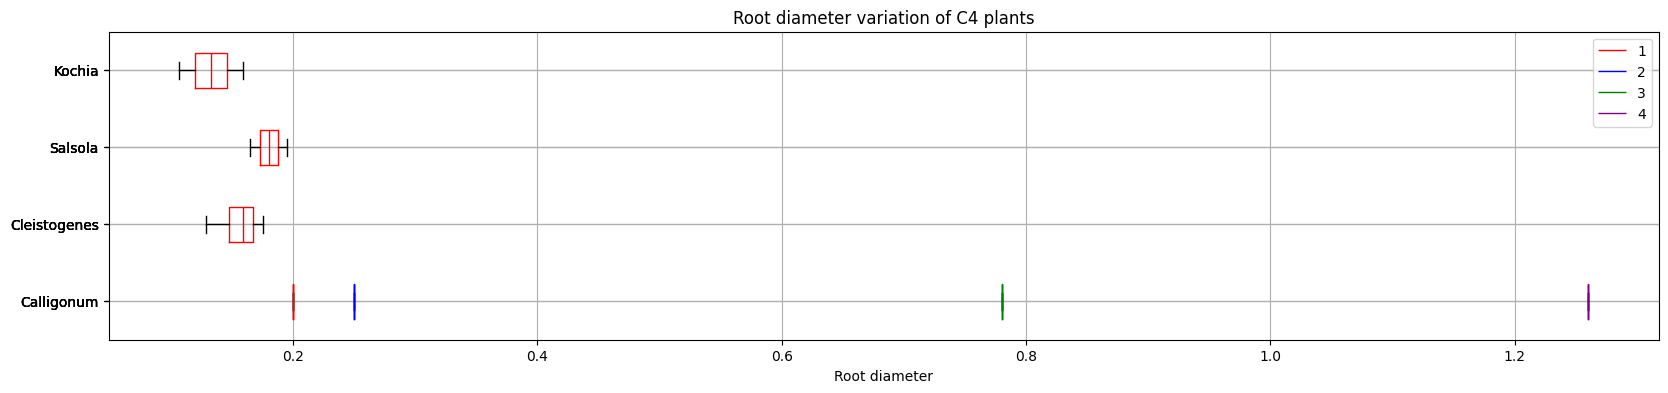

In [31]:
# C4 PLANT ROOT DIAMETERS FROM FRED

fig, axes = plt.subplots()
fig.set_size_inches(20, 4)
for o, c in zip(range(1, 5), ("red", "blue", "green", "purple")):
    axes.boxplot(
    [subset.query(f"root_order=={o}").root_diameter for (_, subset) in c4_plants.groupby("plant_taxonomy_genus_data_source")],
        tick_labels=c4_plants.plant_taxonomy_genus_data_source.unique(), orientation="horizontal", boxprops={"color": c}, medianprops={"color": c}, label=o
    )
axes.set_title("Root diameter variation of C4 plants")
axes.set_xlabel("Root diameter")
axes.legend()
axes.grid()
plt.show()

## ___Atriplex___
---------------

In [121]:
# Artiplex is a genus that has all C3, C4 and C3-C4 intermediate species!!!
fred.loc[fred.F00018 == "Atriplex", ["F00043", "F00018", "F00019"]].drop_duplicates()

,F00043,F00018,F00019
2917,C4,Atriplex,confertifolia
32639,C3,Atriplex,patula
33293,C4,Atriplex,tatarica
33368,C4,Atriplex,canescens
33423,C4,Atriplex,torreyi
33717,NaN,Atriplex,spinosa
34202,C4,Atriplex,halimus
34274,C4,Atriplex,nummularia
48717,C3/C4,Atriplex,cana
48718,C4,Atriplex,dimorphostegia


In [6]:
# ANY OTHER GENERA WITH C3 AND C4 SPECIES???
with pd.option_context("display.max_rows", None):
    print(fred.loc[:, ["F00043", "F00018", "F00019"]].dropna().drop_duplicates().groupby(["F00018", "F00043"]).count())

                           F00019
F00018             F00043        
Abelia             C3           1
Abies              C3          27
Abrus              C3           1
Abutilon           C3           1
Acacia             C3          32
Acaena             C3           1
Acalypha           C3           1
Acamptopappus      C3           1
Acer               C3          30
Achillea           C3           6
Achnatherum        C3           2
Achyranthes        C3           1
Acomastylis        C3           1
Aconitum           C3           2
Acosmium           C3           1
Acroclinium        C3           1
Acronychia         C3           1
Acroptilon         C3           1
Actaea             C3           1
Actinidia          C3           1
Adansonia          C3           1
Adenocaulon        C3           1
Adenophora         C3           1
Adenostorna        C3           1
Adenthera          C3           1
Adesmia            C3           2
Adiantum           C3           1
Adonis        

In [ ]:
# GENERA WITH SPECIES THAT HAVE C3 AND C4 PHOTOSYNTHETIC PATHWAYS

# Artemisia          
# Atriplex           
# Cyperus            
# Euphorbia          
# Haloxylon          
# Heliotropium       
# Potamogeton - aquatic :/     
# Salsola            
# Setaria            
# Suaeda             

In [7]:
# FILLING NANS IN FAMILIES IN FRED
fred.loc[:, ["F00017", "F00018", "F00019"]].isna().mean()

F00017    0.859468
F00018    0.244029
F00019    0.255499
dtype: float64

In [163]:
fred.loc[:, ["F00017", "F00018", "F00019"]].head()

,F00017,F00018,F00019
0,Gleicheniaceae,Dicranopteris,dichotoma
1,Gleicheniaceae,Dicranopteris,dichotoma
2,Gleicheniaceae,Dicranopteris,dichotoma
3,Cupressaceae,Cunninghamia,lanceolata
4,Cupressaceae,Cunninghamia,lanceolata


In [162]:
# THAT'S A LOT BETTER!!!!
fred.loc[:, ["F00017", "F00018", "F00019"]].dropna(subset=["F00018", "F00019"]).F00018.apply(lambda genus: family_lookup.get(genus, np.nan)).isna().mean()

np.float64(0.025600075156183944)

In [13]:
# CONFLICTS ARE THERE!!!!!!!
pd.concat([fred.loc[:, ["F00017", "F00018"]].dropna().drop_duplicates().sort_values(by="F00017"),
           fred.loc[:, ["F00017", "F00018"]].dropna().drop_duplicates().sort_values(by="F00017").F00018.apply(lambda genus: family_lookup.get(genus, np.nan))], 
          axis=1, names=["F00017", "F00018", "looked_up"]).reset_index(drop=True)

,F00017,F00018,F00018
0,Acanthaceae,Rungia,Acanthaceae
1,Acanthaceae,Strobilanthes,Acanthaceae
2,Acardiaceae,Spondias,Anacardiaceae
3,Aceraceae,Acer,Sapindaceae
4,Actinidiaceae,Actinidia,Actinidiaceae
...,...,...,...
531,Winteraceae,Pseudowintera,Winteraceae
532,Zingiberaceae,Alpinia,Zingiberaceae
533,Zingiberaceae,Amomum,Zingiberaceae
534,Zygophyllaceae,Nitraria,Nitrariaceae


In [179]:
# ABOUT 23% FAMILY CONFLICTS BETWEEN FRED AND TAXON LOOKUP
(fred.loc[:, ["F00017", "F00018"]].dropna().drop_duplicates().sort_values(by="F00017").F00017 != fred.loc[:,
            ["F00017", "F00018"]].dropna().drop_duplicates().sort_values(by="F00017").F00018.apply(lambda genus: family_lookup.get(genus, np.nan))).mean()

np.float64(0.23507462686567165)

In [3]:
MULTIPLE_PHOTOPATH_GENERA = ("Artemisia", "Atriplex", "Cyperus", "Euphorbia", "Haloxylon", "Heliotropium", "Potamogeton",
                             "Salsola", "Setaria", "Suaeda")

In [5]:
with pd.option_context("display.max_rows", None):
    print(
        fred.loc[fred.loc[:, "F00018"].isin(MULTIPLE_PHOTOPATH_GENERA), ["F00018", "F00019", "F00043"]].drop_duplicates().\
            sort_values(by=["F00018", "F00019"])
    )

             F00018          F00019 F00043
48538     Artemisia      absinthium     C3
48541     Artemisia       aralensis     C3
48542     Artemisia        arenaria     C3
48545     Artemisia       armeniaca    NaN
45222     Artemisia      barrelieri    NaN
53702     Artemisia     californica     C3
42500     Artemisia      campestris     C3
45333     Artemisia            cana    NaN
15294     Artemisia      capillaris     C3
42504     Artemisia       carruthii     C3
48546     Artemisia       caucasica    NaN
48547     Artemisia            cina    NaN
27253     Artemisia   codonocephala    NaN
42508     Artemisia     dracunculus     C4
48551     Artemisia       eranthema    NaN
48553     Artemisia     ferganensis    NaN
34782     Artemisia       filifolia    NaN
15322     Artemisia         frigida     C3
48555     Artemisia          glauca    NaN
30242     Artemisia        gmelinii     C3
15339     Artemisia     halodendron     C3
54375     Artemisia        igniaria     C3
15321     A

In [117]:
congeneric = fred.loc[fred.loc[:, "F00018"].isin(MULTIPLE_PHOTOPATH_GENERA), ["F00018", "F00019", "F00043"]].drop_duplicates().\
            sort_values(by=["F00018", "F00019"]) # .rename(columns={"F00018": "genus", "F00019": "species",
                                                            #     "F00043": "photosynthetic_pathway"}).reset_index(drop=True)
congeneric.loc[:, "taxon_name"] = congeneric.F00018 + ' ' + congeneric.F00019
congeneric.drop(columns=["F00018", "F00019"], inplace=True)

In [118]:
congeneric

,F00043,taxon_name
48538,C3,Artemisia absinthium
48541,C3,Artemisia aralensis
48542,C3,Artemisia arenaria
48545,NaN,Artemisia armeniaca
45222,NaN,Artemisia barrelieri
...,...,...
45525,C4,Setaria pumila
15319,C4,Setaria viridis
52931,C3/C4,Suaeda altissima
34195,C4,Suaeda asphaltica


## ___Australasian Virtual Herbaria Lookup___
--------------------

In [119]:
with pd.option_context("display.max_rows", None):
    print(
        pd.merge(left=australian_avh_records, left_on="taxon_name", right=congeneric, right_on="taxon_name",
                 how="inner").drop_duplicates()
    )

                  taxon_name  count F00043
0       Artemisia absinthium     16     C3
1         Artemisia vulgaris      8     C3
2      Artemisia ludoviciana      3     C3
3          Artemisia pontica      3     C3
4         Artemisia maritima      2     C3
5        Atriplex nummularia    736     C4
6            Atriplex patula     69     C3
7         Atriplex canescens      6     C4
8            Suaeda maritima     28     C3
9          Cyperus difformis   1494     C3
10          Cyperus rotundus    558     C4
11        Cyperus compressus    269     C4
12        Cyperus esculentus     97     C4
13           Cyperus papyrus     39     C4
14         Cyperus cyperinus     33     C4
15           Cyperus triceps     33     C4
16     Cyperus alternifolius      1     C3
17  Heliotropium ovalifolium    541     C3
18            Salsola tragus   1259     C4
19              Salsola kali    141     C4


In [5]:
# Cyperus species in New South Wales
cyperus_nsw

,taxon_name,count
0,Cyperus sanguinolentus,292
1,Cyperus polystachyos,265
2,Cyperus lucidus,263
3,Cyperus eragrostis,251
4,Cyperus fulvus,249
...,...,...
89,Cyperus curvistylis,1
90,Cyperus hamulosus,1
91,Cyperus nervulosus,1
92,Cyperus pulchellus,1


In [16]:
# FRED has messed up classification info

fred.loc[:, ["F00043", "F00017", "F00018", "F00019"]].query("F00017=='Cyperaceae'").drop_duplicates()

,F00043,F00017,F00018,F00019
1572,NaN,Cyperaceae,Gahnia,procera
1573,NaN,Cyperaceae,Gahnia,xanthocarpa
27262,NaN,Cyperaceae,Carex,doisutepensis
27263,C3,Cyperaceae,Carex,flacca
27264,C3,Cyperaceae,Carex,humilis
27270,C3,Cyperaceae,Cyperus,difformis
27316,C3,Cyperaceae,Trichophorum,cespitosum
32761,C3,Cyperaceae,Carex,moorcroftii


In [18]:
fred.loc[:, ["F00043", "F00017", "F00018", "F00019"]].query("F00018=='Cyperus'").drop_duplicates()

,F00043,F00017,F00018,F00019
2597,C4,NaN,Cyperus,papyrus
27270,C3,Cyperaceae,Cyperus,difformis
49588,C3,NaN,Cyperus,alternifolius
49589,C4,NaN,Cyperus,esculentus
49590,C3,NaN,Cyperus,fuscus
49591,C4,NaN,Cyperus,glomeratus
49592,C4,NaN,Cyperus,rotundus
53675,C4,NaN,Cyperus,compressus
53676,C4,NaN,Cyperus,cyperinus
53677,C4,NaN,Cyperus,triceps


In [21]:
fred.loc[:, ["F00043", "F00017", "F00018", "F00019"]].query("F00018=='Carex'").drop_duplicates()

,F00043,F00017,F00018,F00019
2686,C3,NaN,Carex,rostrata
2750,NaN,NaN,Carex,NaN
2885,NaN,NaN,Carex,stans
2890,C3,NaN,Carex,scopulorum
5219,C3,NaN,Carex,aquatilis
...,...,...,...,...
49262,C3,NaN,Carex,vulgaris
49265,C3,NaN,Carex,vulpina
53673,C3,NaN,Carex,baccans
53674,NaN,NaN,Carex,myosurus


In [25]:
carex_nsw.sort_values(by="count", ascending=False)

,taxon_name,count
0,Carex inversa,483
1,Carex appressa,379
2,Carex gaudichaudiana,278
3,Carex breviculmis,216
4,Carex longebrachiata,188
5,Carex pumila,119
6,Carex fascicularis,105
7,Carex brunnea,104
8,Carex hypandra,75
9,Carex echinata,71


In [28]:
with pd.option_context("display.max_rows", None):
    print(cyperus_nsw.sort_values(by="count", ascending=False))

                                  taxon_name  count
0                     Cyperus sanguinolentus    292
1                       Cyperus polystachyos    265
2                            Cyperus lucidus    263
3                         Cyperus eragrostis    251
4                             Cyperus fulvus    249
5                           Cyperus gracilis    241
6                          Cyperus difformis    235
7                        Cyperus brevifolius    186
8                       Cyperus sphaeroideus    162
9                          Cyperus exaltatus    148
10                       Cyperus lhotskyanus    146
11                      Cyperus tetraphyllus    136
12              Cyperus gunnii subsp. gunnii    133
13                         Cyperus congestus    116
14                        Cyperus laevigatus    115
15                         Cyperus flaccidus    113
16                            Cyperus laevis    109
17                          Cyperus rotundus    109
18          